# **Exercise: Optimization algorithm**

<div align = "justify">
Implement the gradient descent algorithm to find the minimum of the following
function:


$$f(x) = x^2 + 4x + 5$$
</div>

<div align = "justify">

**Step 1: Define a function to minimize**

We want to find the minimum of the following function
$$f(x) = x^2 + 4x + 5$$

\
**Step 2: Compute the gradient**

Calculate the gradient, that is the derivative of the function.
$$ \nabla f(x) = \frac{d f(x)}{d x}$$

\
**Step 3: Update x**

Update the parameters $\omega$ and $b$ using the learning rate $\alpha$:

$$x_{n+1} = x_{n} - \alpha \cdot \nabla f(x_{n})$$

Where
$\alpha$ is the learning rate.

Recall...

Small $\alpha$: Slow convergence.

Large $\alpha$: Risk of overlooking the minimum.
</div>

In [ ]:
import numpy as np # Linear algebra
import matplotlib.pyplot as plt # Plot
import math # Built-in module for mathematical tasks

In [ ]:
# Create the class
class MinimizeFunction():

  # Constructor method
  def __init__(self, x, learning_rate, iterations_num):
    self._x = x  # Initialize the starting point
    self._learning_rate = learning_rate
    self._iterations_num = iterations_num
    self._x_old = None  # Will store x values after gradient descent
    self._y = None  # Will store function values after gradient descent

  # Define the function to minimize
  def f(self, x):
    return x**2 + (4*x) + 5

  # Use the definition of the derivative
  def first_derivative(self, x, h=1e-6):
    return (self.f(x + h) - self.f(x)) / h

  # Gradient descent algorithm
  def gradient_descent(self):
    # Save the points to plot them later
    self._x_old = np.zeros(self._iterations_num + 1)
    self._y = np.zeros(self._iterations_num + 1)

    self._x_old[0] = self._x  # Save the first point
    self._y[0] = self.f(self._x_old[0])  # Evaluate the point in the function

    print(f"Starting point: (x = {self._x_old[0]}, y = {self._y[0]})\n")

    for i in range(1, self._iterations_num + 1):  # Create the iterations
      # Update the new variable
      self._x_old[i] = self._x_old[i-1] - (self._learning_rate * self.first_derivative(self._x_old[i-1]))

      # Calculate the function value at the new point
      self._y[i] = self.f(self._x_old[i])

      if i % 5 == 0:
        print(f"Iteration {i}: (x = {round(self._x_old[i], 4)}, y = {round(self._y[i], 4)})")

    return self._x_old[-1], self._y[-1]


  # Plot the function and the minimum value
  def graph_minimum(self):
    # This conditional handles a possible error
    if self._x_old is None or self._y is None:
      raise ValueError("You must run gradient_descent() before calling graph_minimum().")

    x_min = self._x_old[-1]
    y_min = self._y[-1] # Obtain the minimum value

    x = np.linspace(x_min - 4.9, x_min + 5.1, 100)  # Define the range around the minimum
    y = [self.f(num) for num in x]  # Calculate function values for each x

    plt.plot(x, y, label="Function", color='blue')
    plt.scatter(self._x_old, self._y, color='orange', label="Steps", s=50)
    plt.scatter(x_min, y_min, color='red', label="Minimum", marker='o', edgecolors='black', s=100)

    plt.title("Function with minimum point using Gradient Descent algorithm")
    plt.xlim(x_min - 1.5, x_min + 1.5) # Set limits in x-axis relative to the minimum
    plt.ylim(y_min - 0.3, y_min + 0.5)  # Set dynamic limits for the y-axis
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.legend()  # Show the labels
    plt.grid()
    plt.show()

In [ ]:
initial_value = 1
learning_rate = 0.1
iterations_num = 30

# Running Gradient Descendent method
g_desc = MinimizeFunction(initial_value, learning_rate, iterations_num)
x_min, y_min = g_desc.gradient_descent()
print(f"\nSolution found (x axis): {x_min}")
print(f"Minimum value (y axis): {y_min}")

# This is a robust algorithm since it makes all the computations inside the class,
# so the user won't use some of the methods.

Starting point: (x = 1.0, y = 10.0)

Iteration 5: (x = -1.017, y = 1.9664)
Iteration 10: (x = -1.6779, y = 1.1038)
Iteration 15: (x = -1.8944, y = 1.0111)
Iteration 20: (x = -1.9654, y = 1.0012)
Iteration 25: (x = -1.9887, y = 1.0001)
Iteration 30: (x = -1.9963, y = 1.0)

Solution found (x axis): -1.9962866792576648
Minimum value (y axis): 1.0000137887509353


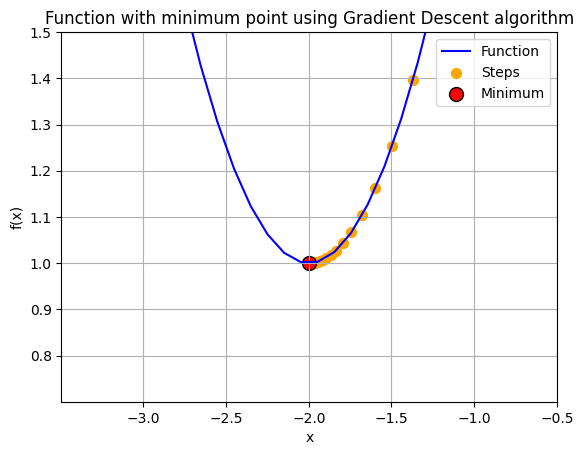

In [ ]:
g_desc.graph_minimum()